### 웹 페이지 정보 추출(Extracting information from a webpage)
- 웹페이지를 불러들인다
    - requests 모듈
- 필요한 정보 추출
    - re 모듈
    - bs4 모듈

In [ ]:
# 웹페이지 불러들이기
import requests
url = "https://www.inje.ac.kr/kor/Template/Bsub_page.asp?Ldir=board/S_Food&Lpage=s_food_view"
response = requests.get(url, verify=False)
#response.encoding = 'EUC-KR'
page = response.text

#### 정규표현식
- 메타문자
    - .^$*+?{}[]\|()
    - 메타문자를 문자로 사용하고 싶은경우 앞에 \(역슬래시)를 붙여야한다.
- 문자클래스
    - [a-d] : [abcd]와 동일
    - [a-z] : 소문자
    - [a-zA-Z0-9] : 대소문자나 숫자
    - [^0-9] : 숫자가 아닌 모든 문자
- 반복
    - * : 0 번 이상 반복
    - + : 1 번 이상 반복
    - {3} : 3회 반복
    - {3,5} : 3회 또는 4회 또는 5회 반복
    - {3,} : 3회 이상 반복

In [ ]:
# 4자리수 연도를 추출
import re
s = "Copyright(c) 1996-2022 INJE UNIVERSITY2. All rights reserved."
matches = re.findall("[0-9]{4}", s)
print(matches)

In [ ]:
# 필요한 정보 추출하기
import requests
import re

url = "https://www.inje.ac.kr/kor/Template/Bsub_page.asp?Ldir=board/S_Food&Lpage=s_food_view"
response = requests.get(url, verify=False)
#response.encoding = 'EUC-KR'
page = response.text

menus = re.findall('<td class="tc">(.+</td>)', page)
for i, menu in enumerate(menus):
    print(i,menu)
    
# 메뉴 보기 좋게 출력하기
y = "월화수목금"
strs = "[다인]\n"
for i in range(0,5):
    menu = menus[i].replace("<br>", " ")
    menu = menu.replace("&nbsp", " ")
    menu = menu.replace(";</td>", " ")
    menu = re.sub("\([^)]+\)", "",menu)
    menu = re.sub("\([^)]+\)", "",menu)
    menu = re.sub("\s{2,}", "",menu)
    menu = menu.strip()
    strs += f"{y[i]}: {menu}\n"
print(strs)

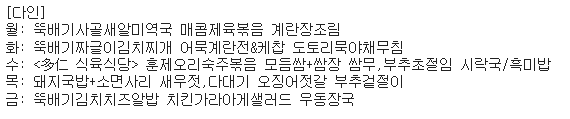

### Beautiful Soup
- html 문서의 계층 구조를 이요해 각 요소들에 자유롭게 접근할 수 있도록 도와주는 모듈
- bs4 모듈에서 import
- page 변수에 담긴 정보를 html.parser로 분석해 beutifulsoup 객체를 만들어 soup 변수에 담음
- soup 안에서 td 태그 중 class 값이 tc인 것들을 찾아 리스트로 만들어 menu_tags 변수에 담음

In [ ]:
# BeautifulSoup 을 이용해 웹페이지 정보 추출
from bs4 import BeautifulSoup
soup = BeautifulSoup(page, "html.parser")
menu_tags = soup.find_all("td", attrs={"class":"tc"})

for i, menu_tag in enumerate(menu_tags):
  menu = menu_tag.getText(" ")
  print(i, menu)
  
y = "월화수목금"
strs = ""
for i in range(0,5):
    menu =menu_tags[i+2].getText(" ")
    menu = re.sub("\([^)]+\)", "",menu)
    menu = menu.strip()
    strs += f"{y[i]}: {menu}\n"
print(strs)

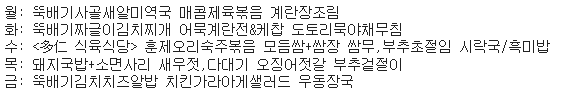